# Text Classification using RNN

# The objective of this assignment is to implement a text classification task using Recurrent Neural Networks (RNNs). You will build a model to classify text data into predefined categories using Python.
Dataset:
Use the given dataset Spam & Ham, it contains below columns
Class: Spam or Ham
Message: Email content

# Step 1: Import Libraries

In [1]:
import pandas as pd
import numpy as np
import re
import string
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, SimpleRNN, Dense, Dropout

#  Step 2: Load & Clean Dataset

In [3]:
# load dataset
df = pd.read_csv("/content/spam.csv", encoding='latin-1')
df.columns = ['label', 'text']

In [5]:
# Binary labels
df['label'] = df['label'].map({'ham': 0, 'spam': 1})

# Clean text
def clean_text(text):
    text = text.lower()
    text = re.sub(r"http\\S+|www\\S+", '', text)
    text = re.sub(r'\\@\\w+|\\#', '', text)
    text = re.sub(f'[{re.escape(string.punctuation)}]', '', text)
    text = re.sub(r'\\d+', '', text)
    text = re.sub(r'\\s+', ' ', text).strip()
    return text

df['text'] = df['text'].apply(clean_text)

In [6]:
df.head()

,label,text
0,0,go until jurong point crazy available only in ...
1,0,ok lar joking wif u oni
2,1,free entry in 2 a wkly comp to win fa cup fina...
3,0,u dun say so early hor u c already then say
4,0,nah i dont think he goes to usf he lives aroun...


# Step 3: Tokenize & Pad Sequences

In [9]:
# we taken 5000
max_words = 5000
max_len = 100

In [11]:
# Tokenized
tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(df['text'])
X = tokenizer.texts_to_sequences(df['text'])
X = pad_sequences(X, maxlen=max_len)
y = df['label'].values

# Step 4: Train/Test Split

In [12]:
# training and testing the above data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 5: Build & Train RNN Model

In [13]:
model = Sequential([
    Embedding(input_dim=max_words, output_dim=64, input_length=max_len),
    SimpleRNN(64),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

# Train
history = model.fit(X_train, y_train, epochs=5, batch_size=64, validation_split=0.2)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ simple_rnn (SimpleRNN)          │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

Epoch 1/5
56/56 ━━━━━━━━━━━━━━━━━━━━ 5s 47ms/step - accuracy: 0.8203 - loss: 0.4452 - val_accuracy: 0.9652 - val_loss: 0.1299
Epoch 2/5
56/56 ━━━━━━━━━━━━━━━━━━━━ 5s 41ms/step - accuracy: 0.9758 - loss: 0.1058 - val_accuracy: 0.9776 - val_loss: 0.0829
Epoch 3/5
56/56 ━━━━━━━━━━━━━━━━━━━━ 3s 60ms/step - accuracy: 0.9846 - loss: 0.0624 - val_accuracy: 0.9496 - val_loss: 0.1468
Epoch 4/5
56/56 ━━━━━━━━━━━━━━━━━━━━ 2s 39ms/step - accuracy: 0.9540 - loss: 0.1325 - val_accuracy: 0.9798 - val_loss: 0.0640
Epoch 5/5
56/56 ━━━━━━━━━━━━━━━━━━━━ 3s 42ms/step - accuracy: 0.9917 - loss: 0.0348 - val_accuracy: 0.9798 - val_loss: 0.0618


#  Step 6: Evaluate Model

In [14]:
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {accuracy:.4f}")

35/35 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.9803 - loss: 0.0702
Test Accuracy: 0.9740


# Step 7: Classification Report

35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.99      0.99       965
           1       0.92      0.88      0.90       150

    accuracy                           0.97      1115
   macro avg       0.95      0.93      0.94      1115
weighted avg       0.97      0.97      0.97      1115



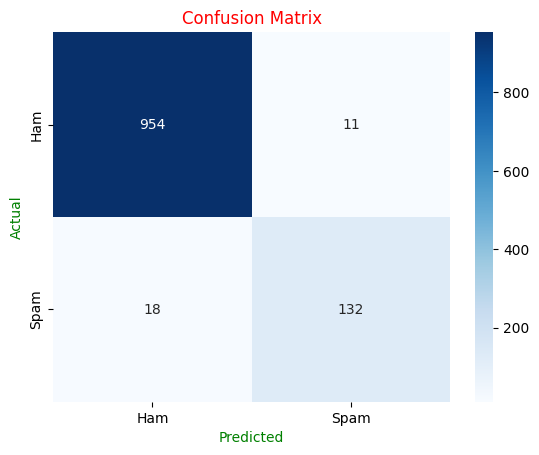

In [19]:
# Predicted classification report
y_pred = (model.predict(X_test) > 0.5).astype("int32")

print("Classification Report:")
print(classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=['Ham', 'Spam'], yticklabels=['Ham', 'Spam'])
plt.xlabel("Predicted", color= "green")
plt.ylabel("Actual", color= "green")
plt.title("Confusion Matrix", color= "red")
plt.show()